# Работа с базами данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Работа с базами данных"
* https://sqliteonline.com/
* https://docs.python.org/3/library/sqlite3.html
* https://www.sqlitetutorial.net/sqlite-create-table/
* https://docs.python.org/3/library/pickle.html
* https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
* https://www.datacamp.com/community/tutorials/group-by-having-clause-sql

## Задачи для совместного разбора

In [1]:
import pandas as pd
import sqlite3

In [ ]:
students = pd.DataFrame(
    [
        ("Сотников Евгений Янович", 1),
        ("Степанова Виктория Константиновна", 1),
        ("Горелова Вероника Яновна", 2),
        ("Гришин Иван Романович", 3),
    ],
    columns=["name", "group_id"],
)


groups = list(zip([1, 2, 3], ["ПМ20-1", "ПМ20-2", "ПМ20-3"]))

1. Создайте БД sqlite3 и таблицы Student и StudentGroup в ней.

2. Заполните созданные таблицы данными

3. Выведите на экран фамилии студентов и номера их групп.

## Лабораторная работа 9

### Создание и заполнение базы данных

In [247]:
con = sqlite3.connect('mydb.db')
cur = con.cursor()

In [248]:
sql2="""
DROP TABLE REVIEW;
DROP TABLE RECIPE;
DROP TABLE TAG;
DROP TABLE INGREDIENT;
"""
cur.executescript(sql2);

1\. Создайте файл БД sqlite3 согласно рисунку ниже, на котором определен набор таблиц и связей между ними. Обратите внимание, что поля, выделенные полужирным шрифтом, обозначают первичный ключ таблицы.

Для решения задания напишите скрипт на языке SQL и исполните его при помощи метода `executescript` объекта-курсора.

In [249]:
sql = """
CREATE TABLE IF NOT EXISTS  REVIEW
(
ID INTEGER PRIMARY KEY NOT NULL,
USER_ID INTEGER NOT NULL,
RECIPE_ID INTEGER NOT NULL,
DATE VARCHAR(59),
RATING INTEGER,
REVIEW TEXT,
FOREIGN KEY (RECIPE_ID) REFERENCES RECIPE (ID)
);

CREATE TABLE IF NOT EXISTS  RECIPE
(
ID INTEGER PRIMARY KEY NOT NULL,
NAME VARCHAR(50),
MINUTES INTEGER ,
SUBMITTED VARCHAR(59),
DESCRIPTION TEXT,
N_INGREDIENTS INTEGER
);

CREATE TABLE IF NOT EXISTS  TAG
(
TAG VARCHAR(20),
RECIPE_ID INTEGER,
PRIMARY KEY (TAG,RECIPE_ID),
FOREIGN KEY (RECIPE_ID) REFERENCES RECIPE (ID)
);

CREATE TABLE IF NOT EXISTS  INGREDIENT
(
INGREDIENT_NAME VARCHAR(20),
RECIPE_ID INTEGER,
PRIMARY KEY (INGREDIENT_NAME,RECIPE_ID),
FOREIGN KEY (RECIPE_ID) REFERENCES RECIPE (ID)
);
"""
cur.executescript(sql);

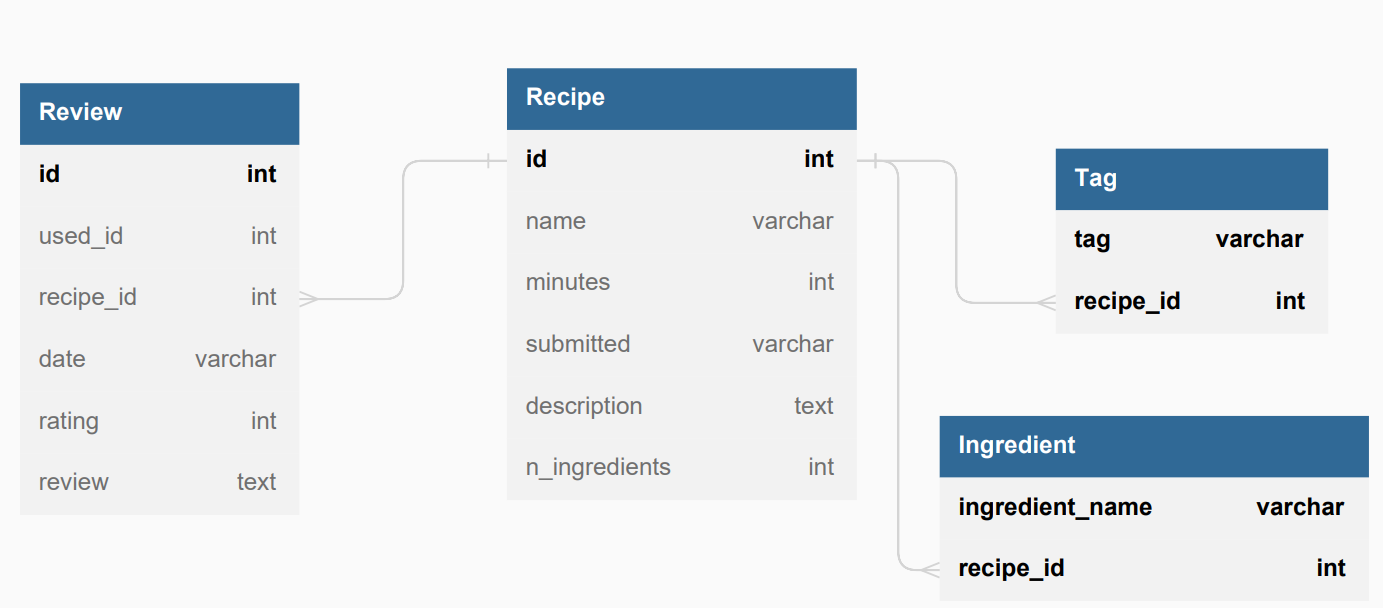

2\. Загрузите данные из файла `recipes_sample.csv` в таблицу `Recipe`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора.

In [250]:
recipes = pd.read_csv('recipes_sample.csv') #, , parse_dates=["submitted"]

In [251]:
cur.executemany(
    "INSERT INTO RECIPE VALUES(:id, :name, :minutes, :submitted, :description, :n_ingredients)",
    recipes[['id','name','minutes', 'submitted', 'description','n_ingredients']].values
)

In [253]:
sqlx ="""
SELECT * FROM RECIPE
"""
pd.read_sql(sqlx,con).head()

,ID,NAME,MINUTES,SUBMITTED,DESCRIPTION,N_INGREDIENTS
0,48,boston cream pie,135,1999-08-24,None,15.0
1,55,betty crocker s southwestern guacamole dip,125,1999-09-15,None,5.0
2,66,black coffee barbecue sauce,30,1999-09-10,it's great to know folks like this sauce so mu...,11.0
3,91,brown rice and vegetable pilaf,150,1999-09-06,this is good with almost anything... robb,NaN
4,94,blueberry buttertarts,40,1999-09-12,None,NaN


In [337]:
con.commit()

3\. Загрузите данные из файла `tags_sample.pickle` в таблицу `Tag`. При выполнении задания воспользуйтесь методом `executemany` объекта-курсора. Для считывания файла с данными воспользуйтесь пакетом `pickle`. Обратите внимание, что перед добавлением записей в базу данные нужно привести к соответствующему таблице в БД виду (в каждой строчке столбца tag должен находиться один тэг).

In [254]:
import pickle
with open('tags_sample.pickle', 'rb') as f:
    tag = pickle.load(f)

In [255]:
cur.executemany(
    "INSERT INTO TAG VALUES(:tag, :recipe_id)",
    [[t, tg['id']] for tg in tag for t in tg['tag']]
)


In [256]:
sqlx ="""
SELECT * FROM tag
"""
pd.read_sql(sqlx,con).head()

,TAG,RECIPE_ID
0,course,48
1,north-american,48
2,equipment,48
3,american,48
4,preparation,48


In [338]:
con.commit()

4\. Загрузите данные из файла `reviews_sample.csv` в таблицу `Review`. При выполнении задания воспользуйтесь методом `pd.DataFrame.to_sql`.

In [257]:
reviews = pd.read_csv('reviews_sample.csv')

In [258]:
reviews = reviews.rename(columns={"Unnamed: 0": "id"})

In [259]:
reviews.to_sql('REVIEW',con, if_exists='replace', index=False)

126696

In [260]:
sqlx ="""
SELECT * FROM REVIEW
"""
pd.read_sql(sqlx,con).head()

,id,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


In [339]:
con.commit()

5\. Загрузите данные из файла `ingredients_sample.csv` в таблицу `Ingredients`. При выполнении задания воспользуйтесь методом `DataFrame.to_sql`.

Обратите внимание, перед вызовом метода `to_sql` вам требуется привести фрейм к соответствующему таблице в БД виду.

In [261]:
ingredients = pd.read_csv('ingredients_sample.csv')
ingredients['ingredients'] = ingredients.ingredients.str.split(';')
ingredients = ingredients.explode('ingredients')
ingredients['ingredients'] = ingredients.ingredients.str.strip()
ingredients.columns = ['recipe_id', 'ingredient_name']

In [262]:
ingredients.to_sql('INGREDIENT',con, if_exists='replace', index=False)

270178

In [263]:
sqlx ="""
SELECT * FROM INGREDIENT
"""
pd.read_sql(sqlx,con).head()

,recipe_id,ingredient_name
0,48,cornstarch
1,48,milk
2,48,eggs
3,48,margarine
4,48,butter


In [270]:
con.commit()

### Получение данных из базы

6\. Напишите и выполните запрос на языке SQL, который считает кол-во рецептов, опубликованных в 2010 году и имеющих длину не менее 15 минут. Для выполнения запроса используйте метод `execute` объекта-курсора. Выведите искомое количество на экран.

In [269]:
sql6 = """
SELECT count(*) FROM RECIPE
WHERE minutes >= 15 AND
submitted BETWEEN '2010-01-01' AND '2010-12-31'
"""
cur.execute(sql6)
cur.fetchall()[0][0]

1319

7\. Напишите и выполните запрос на языке SQL, который возращает id рецептов, не имеющих ни одного отзыва отзывов с рейтингом, меньше 4. Для выполнения запроса используйте функцию `pd.read_sql_query`. Выведите полученный результат на экран.

In [292]:
sql7 ="""
SELECT DISTINCT(recipe.id) FROM recipe 
LEFT JOIN review
ON recipe.id = review.recipe_id
WHERE review.rating >= 4
"""
pd.read_sql(sql7,con)

,ID
0,57993
1,142201
2,252013
3,404716
4,129396
...,...
26313,422945
26314,94096
26315,154964
26316,187418


8\. Создайте `pd.DataFrame`, содержащий данные из таблицы `Tag`. Создайте `pd.DataFrame`, содержащий данные из таблицы `Recipe` (для создания фреймов можно воспользоваться функцией `read_sql_query`). 

Используя механизмы группировки и объединения, которые предоставляет `pandas`, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. Измерьте время выполнения работы вашего кода (в замеры включите время, которое тратится на загрузку таблиц).

In [332]:
%%timeit
tags = pd.read_sql_query("SELECT * FROM TAG", con=con)
recipes = pd.read_sql_query("SELECT * FROM RECIPE", con=con)
merged = recipes.merge(tags, left_on="ID", right_on="RECIPE_ID", how='left')
merged.groupby("ID")["TAG"].count().sort_values(ascending=False)[:5]

655 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [333]:
tags = pd.read_sql_query("SELECT * FROM TAG", con=con)
recipes = pd.read_sql_query("SELECT * FROM RECIPE", con=con)
merged = recipes.merge(tags, left_on="ID", right_on="RECIPE_ID", how='left')
merged.groupby("ID")["TAG"].count().sort_values(ascending=False)[:5]

ID
66309    58
60942    56
64386    53
72657    53
35105    52
Name: TAG, dtype: int64

9\. Используя механизмы группировки и объединения, которые предоставляет SQL, выведите на экран названия и количество тегов 5 рецептов, которые имеют наибольшее количество тэгов. При выполнении задания воспользуйтесь методом `execute` объекта-курсора. Измерьте время выполнения работы вашего кода.

Вся необходимая логика (группировки, объединения, выбор топ-5 строк) должна быть реализована на SQL, а не в виде кода на Python.

In [335]:
%%timeit
sql9 ="""
SELECT RECIPE.id, COUNT(TAG.recipe_id) FROM RECIPE
LEFT JOIN TAG
ON RECIPE.id = TAG.recipe_id
GROUP BY RECIPE.id
ORDER BY count(TAG.recipe_id) DESC LIMIT 5
"""
cur.execute(sql9)
cur.fetchall()

461 ms ± 1.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [334]:
sql9 ="""
SELECT RECIPE.id, COUNT(TAG.recipe_id) FROM RECIPE
LEFT JOIN TAG
ON RECIPE.id = TAG.recipe_id
GROUP BY RECIPE.id
ORDER BY count(TAG.recipe_id) DESC LIMIT 5
"""
cur.execute(sql9)
cur.fetchall()

[(66309, 58), (60942, 56), (64386, 53), (72657, 53), (35105, 52)]

10\. Запросите у пользователя id рецепта и верните информацию об этом рецепте. Если рецепт отсутствует, выведите соответствующее сообщение. Для подстановки значения id необходимо воспользоваться специальным синтаксисом, которые предоставляет `sqlite` для этих целей.Продемонстрируйте работоспособность вашего решения.

In [348]:
def get_by_id():
    id_  = input("Enter id: ")
    sql10 = '''
    SELECT * FROM recipe 
    WHERE id = (?)
    '''
    cur.execute(sql10, (id_,))
    result = cur.fetchall()
    if result:
        print(result[0])
    else:
        print("Нет такого рецепта")
get_by_id()
get_by_id()

Enter id: 12
Нет такого рецепта
Enter id: 66309
(66309, 'watermelon basket fruit salad', 40, '2003-07-07', 'since these are basic instructions, the number of servings will depend on the size of your fruit. it can serve a big crowd.', 16)
